# MNIST : Optimization Techniques

## Import Libraries

In [1]:
from keras.datasets import mnist
import keras
import matplotlib.pyplot as plt
%matplotlib inline 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop,Adam,SGD

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Load the Dataset

In [2]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


## Preprocess the Dataset

In [3]:
x_rows = x_train.shape[1]
x_columns = x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], x_rows*x_columns) ## reshape to be one row for each image 28*28
x_test = x_test.reshape(x_test.shape[0], x_rows*x_columns) ## same with x_test
x_train = x_train.astype('float32') ## convert to float
x_test = x_test.astype('float32')
x_train /= 255 ## normalize each image
x_test /= 255
y_train_labels = keras.utils.to_categorical(y_train, num_classes=10) ## one hot encoding
y_test_labels = keras.utils.to_categorical(y_test, num_classes=10)

## Model Architecture

In [4]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(x_rows*x_columns,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [5]:
def reset_weights(model):
    from keras import backend as K

    session = K.get_session()
    for layer in model.layers: 
        if hasattr(layer, 'kernel_initializer'):
            layer.kernel.initializer.run(session=session)


## Compile the model using different optimizers

### 1. RMSProp

In [6]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [7]:
batch_size = 128
epochs = 20
history1 = model.fit(x_train, y_train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 4s 70us/step - loss: 0.2432 - acc: 0.9251 - val_loss: 0.1048 - val_acc: 0.9678
Epoch 2/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.1022 - acc: 0.9689 - val_loss: 0.0841 - val_acc: 0.9742
Epoch 3/20
60000/60000 [==============================] - 2s 34us/step - loss: 0.0761 - acc: 0.9770 - val_loss: 0.0713 - val_acc: 0.9791
Epoch 4/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0606 - acc: 0.9821 - val_loss: 0.0672 - val_acc: 0.9803
Epoch 5/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0496 - acc: 0.9855 - val_loss: 0.0781 - val_acc: 0.9801
Epoch 6/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0442 - acc: 0.9866 - val_loss: 0.0748 - val_acc: 0.9815
Epoch 7/20
60000/60000 [==============================] - 2s 33us/step - loss: 0.0400 - acc: 0.9882 - val_loss: 0.0705 - val_acc

#### Plot

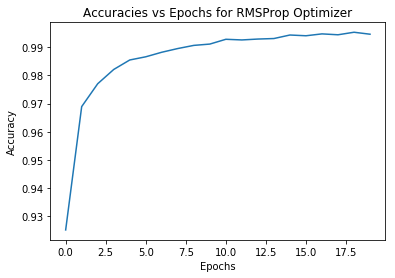

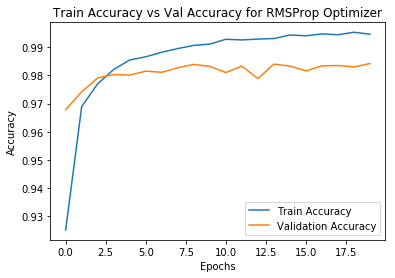

In [8]:
plt.title('Accuracies vs Epochs for RMSProp Optimizer')
plt.plot(history1.history['acc'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()
plt.title('Train Accuracy vs Val Accuracy for RMSProp Optimizer')
plt.plot(history1.history['acc'],label = 'Train Accuracy')
plt.plot(history1.history['val_acc'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#### Reset the Weights

In [9]:
reset_weights(model)

### 2. Adam

In [10]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [11]:
batch_size = 128
epochs = 20
history1 = model.fit(x_train, y_train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2647 - acc: 0.9201 - val_loss: 0.1243 - val_acc: 0.9613
Epoch 2/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.1044 - acc: 0.9681 - val_loss: 0.0750 - val_acc: 0.9756
Epoch 3/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0760 - acc: 0.9765 - val_loss: 0.0780 - val_acc: 0.9746
Epoch 4/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0580 - acc: 0.9815 - val_loss: 0.0655 - val_acc: 0.9782
Epoch 5/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0472 - acc: 0.9854 - val_loss: 0.0671 - val_acc: 0.9785
Epoch 6/20
60000/60000 [==============================] - 2s 37us/step - loss: 0.0409 - acc: 0.9864 - val_loss: 0.0656 - val_acc: 0.9810
Epoch 7/20
60000/60000 [==============================] - 2s 36us/step - loss: 0.0352 - acc: 0.9878 - val_loss: 0.0707 - val_acc

#### Plot

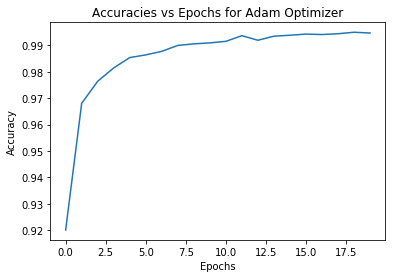

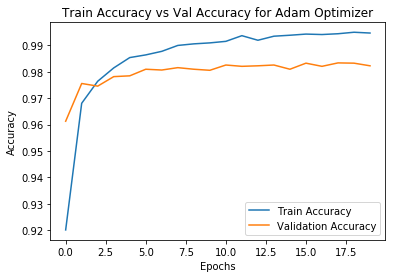

In [12]:
plt.title('Accuracies vs Epochs for Adam Optimizer')
plt.plot(history1.history['acc'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()
plt.title('Train Accuracy vs Val Accuracy for Adam Optimizer')
plt.plot(history1.history['acc'],label = 'Train Accuracy')
plt.plot(history1.history['val_acc'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

#### Reset the weights

In [13]:
reset_weights(model)

### 3. Mini Batch 

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])

In [15]:
batch_size = 128
epochs = 20
history1 = model.fit(x_train, y_train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 35us/step - loss: 1.4109 - acc: 0.6183 - val_loss: 0.6298 - val_acc: 0.8532
Epoch 2/20
60000/60000 [==============================] - 2s 30us/step - loss: 0.5895 - acc: 0.8344 - val_loss: 0.4089 - val_acc: 0.8911
Epoch 3/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.4563 - acc: 0.8690 - val_loss: 0.3427 - val_acc: 0.9048
Epoch 4/20
60000/60000 [==============================] - 2s 31us/step - loss: 0.3993 - acc: 0.8839 - val_loss: 0.3060 - val_acc: 0.9161
Epoch 5/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.3618 - acc: 0.8945 - val_loss: 0.2831 - val_acc: 0.9210
Epoch 6/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.3352 - acc: 0.9036 - val_loss: 0.2642 - val_acc: 0.9264
Epoch 7/20
60000/60000 [==============================] - 2s 29us/step - loss: 0.3147 - acc: 0.9094 - val_loss: 0.2502 - val_acc

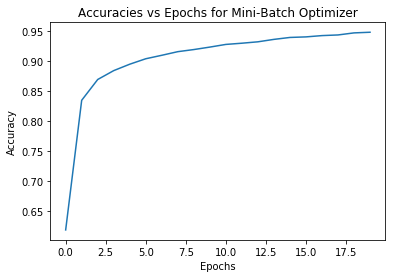

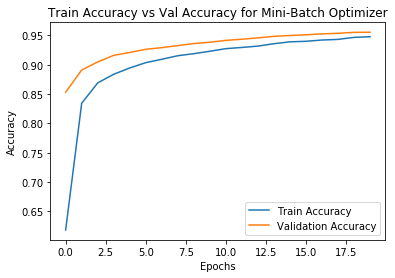

In [16]:
plt.title('Accuracies vs Epochs for Mini-Batch Optimizer')
plt.plot(history1.history['acc'])
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()
plt.title('Train Accuracy vs Val Accuracy for Mini-Batch Optimizer')
plt.plot(history1.history['acc'],label = 'Train Accuracy')
plt.plot(history1.history['val_acc'], label = 'Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()